In [27]:
import pandas as pd
#import fbprophet
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
data = pd.read_csv('Google_Stock_Price_Train.csv')

In [29]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [30]:
df = data[['Date','Open']]

In [31]:
df

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


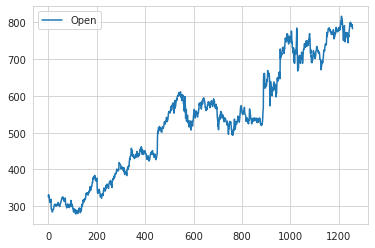

In [33]:
df.plot()
plt.show()

In [34]:
df.columns = ['ds','y']

In [35]:
df

,ds,y
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [36]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [38]:
df

,ds,y
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [39]:
from prophet import Prophet

In [40]:
# Initialize the Model
model = Prophet() 

In [43]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5zpqfgi/3x16pl3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5zpqfgi/ag5ll1nm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18166', 'data', 'file=/tmp/tmpf5zpqfgi/3x16pl3i.json', 'init=/tmp/tmpf5zpqfgi/ag5ll1nm.json', 'output', 'file=/tmp/tmpgcw9d2r2/prophet_model-20220808120358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [46]:
prediction = model.predict(future_dates)

In [47]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,298.297270,279.758444,331.524565,298.297270,298.297270,8.886889,8.886889,8.886889,-5.179425,-5.179425,-5.179425,14.066314,14.066314,14.066314,0.0,0.0,0.0,307.184159
1,2012-01-04,298.451941,281.115197,331.160012,298.451941,298.451941,8.703045,8.703045,8.703045,-4.834381,-4.834381,-4.834381,13.537426,13.537426,13.537426,0.0,0.0,0.0,307.154986
2,2012-01-05,298.606612,280.581321,332.691185,298.606612,298.606612,8.410137,8.410137,8.410137,-4.572412,-4.572412,-4.572412,12.982548,12.982548,12.982548,0.0,0.0,0.0,307.016749
3,2012-01-06,298.761283,280.572719,330.522468,298.761283,298.761283,7.923954,7.923954,7.923954,-4.480263,-4.480263,-4.480263,12.404217,12.404217,12.404217,0.0,0.0,0.0,306.685237
4,2012-01-09,299.225296,277.889233,328.647437,299.225296,299.225296,4.474644,4.474644,4.474644,-6.083041,-6.083041,-6.083041,10.557685,10.557685,10.557685,0.0,0.0,0.0,303.699940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2017-12-26,844.268262,708.443818,995.844559,700.784010,983.238470,11.816728,11.816728,11.816728,-5.179425,-5.179425,-5.179425,16.996153,16.996153,16.996153,0.0,0.0,0.0,856.084990
1619,2017-12-27,844.440009,705.287472,995.879199,700.499008,984.010186,11.891507,11.891507,11.891507,-4.834381,-4.834381,-4.834381,16.725888,16.725888,16.725888,0.0,0.0,0.0,856.331516
1620,2017-12-28,844.611756,706.283786,1004.534243,700.030869,984.775984,11.843108,11.843108,11.843108,-4.572412,-4.572412,-4.572412,16.415520,16.415520,16.415520,0.0,0.0,0.0,856.454864
1621,2017-12-29,844.783503,703.271854,994.402435,699.562730,985.538967,11.586389,11.586389,11.586389,-4.480263,-4.480263,-4.480263,16.066652,16.066652,16.066652,0.0,0.0,0.0,856.369892
